In [2]:
#import relevant libraries and dataset
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'

df = pd.read_csv(url)


In [3]:
#export the dataset to a csv file

df.to_csv('/Users/alexandreribeiro/Desktop/Melbourne_housing_FULL.csv', index=False)

In [4]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4211,Fitzroy,291 George St,2,h,1460000.0,PI,Nelson,12/11/2016,1.6,3065.0,...,1.0,0.0,0.0,105.0,1890.0,Yarra City Council,-37.80060,144.98140,Northern Metropolitan,5825.0
29838,Reservoir,19 Ramleh Rd,4,h,890000.0,S,Nelson,6/01/2018,12.0,3073.0,...,2.0,3.0,NaN,175.0,1990.0,Darebin City Council,-37.70854,145.03110,Northern Metropolitan,21650.0
6072,Kew,97 Edgevale Rd,3,h,NaN,S,Marshall,28/08/2016,5.6,3101.0,...,2.0,2.0,250.0,216.0,2015.0,Boroondara City Council,-37.81150,145.04290,Southern Metropolitan,10331.0
11434,Hawthorn East,1/31 Ryeburne Av,2,u,835000.0,S,Woodards,25/02/2017,7.5,3123.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,6482.0
29296,Blackburn South,9 Mingeta Av,3,h,1050000.0,SP,Ray,6/01/2018,13.4,3130.0,...,1.0,4.0,591.0,NaN,NaN,Whitehorse City Council,-37.84549,145.15229,Eastern Metropolitan,4387.0


In [5]:
df.shape

(34857, 21)

In [6]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
# Checking for non finite values in Price column

df['Price'].isnull().sum()

np.int64(7610)

In [8]:
# Replace infinite values with NaN

df['Price'] = df['Price'].replace([np.inf, -np.inf], np.nan)

# Convert the 'Price' column to Int64 type while preserving NaN values

df['Price'] = df['Price'].astype('Int64')

# Verify the data type and display the first few rows

df['Price'].dtype, df[['Price']].head(10)


(Int64Dtype(),
      Price
 0     <NA>
 1  1480000
 2  1035000
 3     <NA>
 4  1465000
 5   850000
 6  1600000
 7     <NA>
 8     <NA>
 9     <NA>)

In [9]:
# Checking the most common type of property in the dataset

property_counts = df['Type'].value_counts()

property_counts

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/3031921445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_counts.index, y=property_counts.values, order = property_counts.index, palette='inferno')


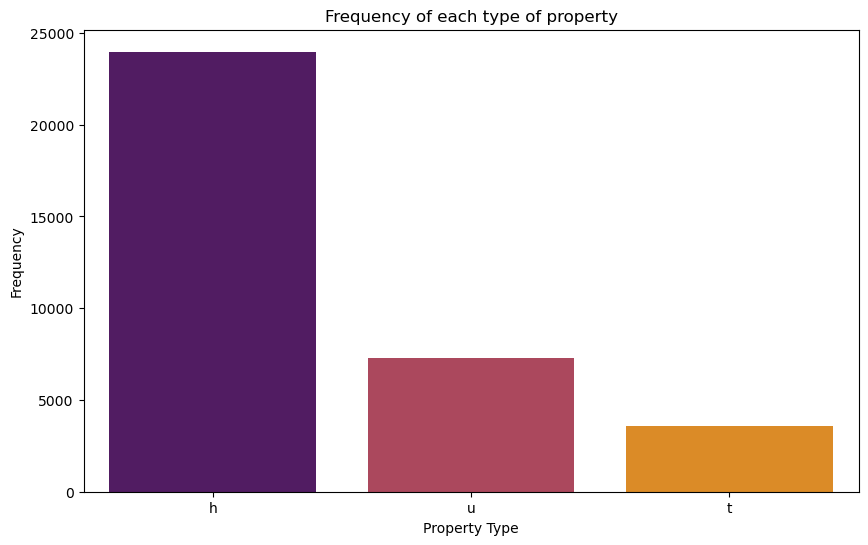

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a barplot to show the frequency of each type of property

plt.figure(figsize=(10, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, order = property_counts.index, palette='inferno')

# Add labels to the plot

plt.title('Frequency of each type of property')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/3045673265.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rooms', y='Price', data=median_price_per_room, palette='viridis')


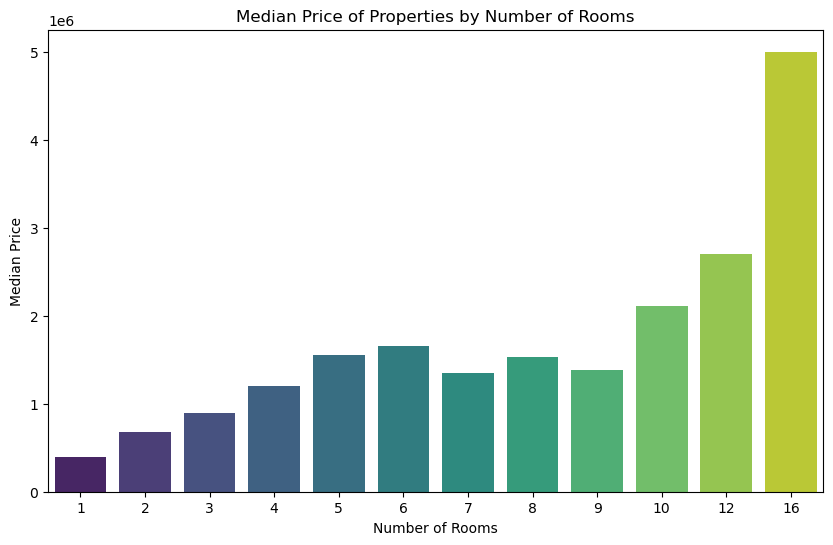

In [11]:
# Grouping the data by Rooms and calculate the median price for each group

median_price_per_room = df.groupby('Rooms')['Price'].median().reset_index()

# Display the results in a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Rooms', y='Price', data=median_price_per_room, palette='viridis')

# Add labels to the plot

plt.title('Median Price of Properties by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.show()

In [12]:
# Using Spearman's test to determine how strong the relationship between the number of rooms and the price of a property is

from scipy.stats import spearmanr

# Drop rows with null values in 'Price' or 'Rooms' columns for correlation calculation

df_clean = df.dropna(subset=['Price', 'Rooms'])

# Calculate the Spearman correlation coefficient

spearman_corr, _ = spearmanr(df_clean['Price'], df_clean['Rooms'])
spearman_corr

np.float64(0.5042971590926004)

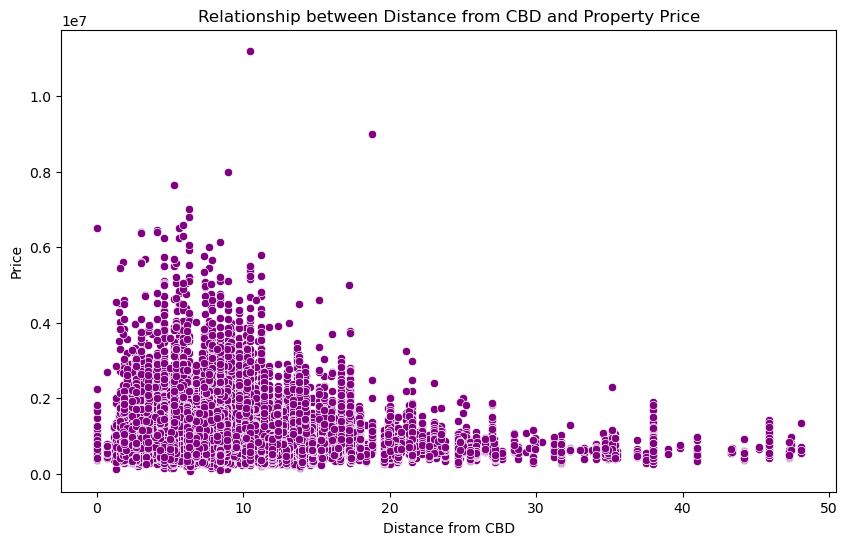

np.float64(-0.18809341092744206)

In [13]:
# Using a scatter plot to see the relationship between the distance from the CBD and the property price

# Dropping null values in both columns

df_clean_distance = df.dropna(subset=['Price', 'Distance'])

# Create a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df_clean_distance, color='purple')
plt.title('Relationship between Distance from CBD and Property Price')
plt.xlabel('Distance from CBD')
plt.ylabel('Price')
plt.show()

# Using spearman's test to determine how strong the relationship between the distance from the CBD and the price of a property is

spearman_corr_distance, _ = spearmanr(df_clean_distance['Price'], df_clean_distance['Distance'])
spearman_corr_distance


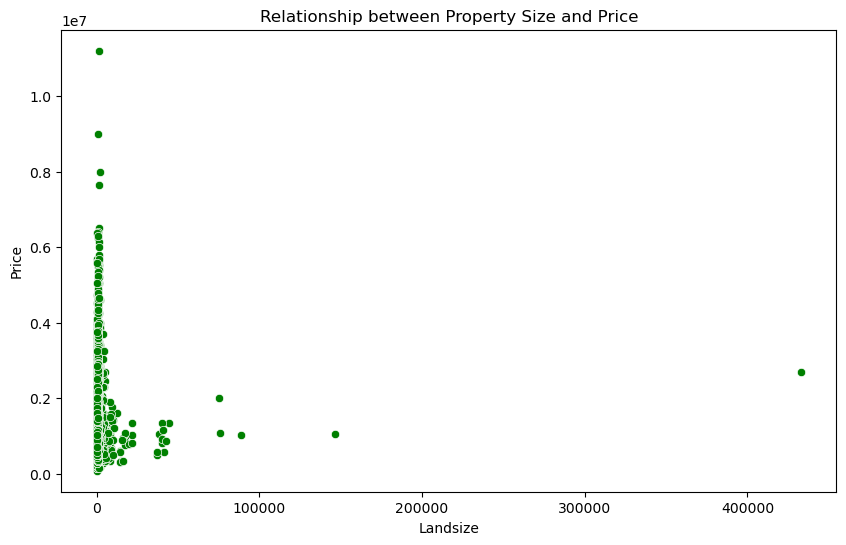

np.float64(0.27661206258697724)

In [14]:
# Relationship between property size and price

# Dropping null values in both columns

df_clean_size = df.dropna(subset=['Price', 'Landsize'])

# Create a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Landsize', y='Price', data=df_clean_size, color='green')
plt.title('Relationship between Property Size and Price')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

# Spearman's test to determine how strong the relationship between the property size and the price of a property is

spearman_corr_size, _ = spearmanr(df_clean_size['Price'], df_clean_size['Landsize'])
spearman_corr_size

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/4264851402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_size['Landsize_category'] = pd.qcut(df_clean_size['Landsize'], q=7, labels=False)
/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/4264851402.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Landsize_category', y='Price', data=median_price_per_landsize, palette='viridis')


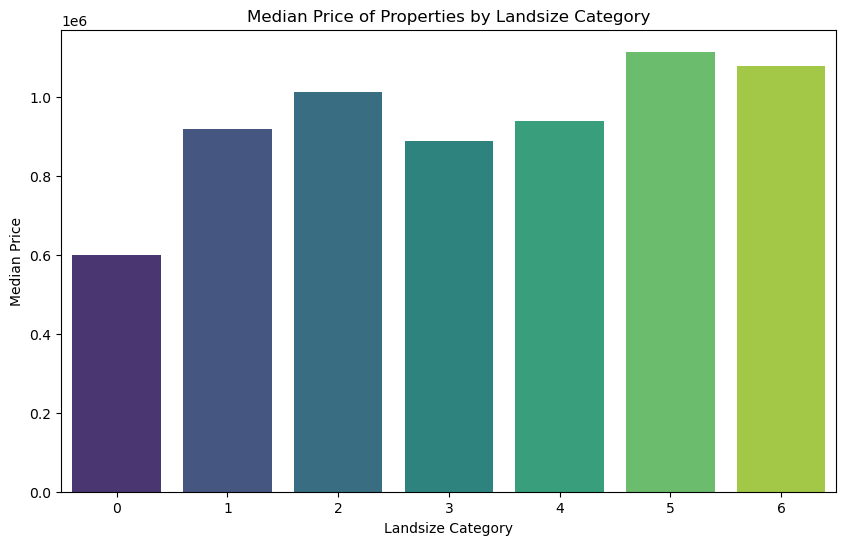

Landsize_category
0    2585
1    2570
2    2553
3    2588
4    2591
5    2530
6    2565
Name: count, dtype: int64

In [15]:
# Using the quantile-based discretization function to categorize landsize, and create a bar plot 

df_clean_size['Landsize_category'] = pd.qcut(df_clean_size['Landsize'], q=7, labels=False)

# Grouping the data by landsize category and calculate the median price for each group

median_price_per_landsize = df_clean_size.groupby('Landsize_category')['Price'].median().reset_index()

# Display the results in a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Landsize_category', y='Price', data=median_price_per_landsize, palette='viridis')

# Add labels to the plot

plt.title('Median Price of Properties by Landsize Category')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.show()

# Show the intervals for the landsize categories

df_clean_size['Landsize_category'].value_counts().sort_index()



In [16]:
# Identifying outliers

df_clean_size['Price'].describe()


count           17982.0
mean     1096035.930097
std       653436.167348
min             85000.0
25%            660000.0
50%            918000.0
75%           1350000.0
max          11200000.0
Name: Price, dtype: Float64

In [17]:
# Calculate the IQR

Q1 = df_clean_size['Price'].quantile(0.25)
Q3 = df_clean_size['Price'].quantile(0.75)

IQR = Q3 - Q1

# Apply the Tukey's treshold of 1.5 to identify outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers

outliers = df_clean_size[(df_clean_size['Price'] < lower_bound) | (df_clean_size['Price'] > upper_bound)]

outliers_percentage = (len(outliers) / len(df_clean_size)) * 100

outliers_percentage

4.487821154487821

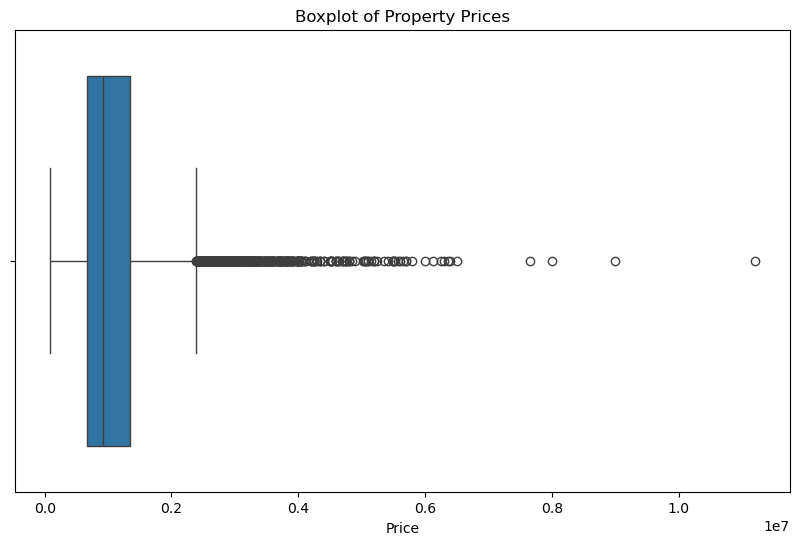

In [18]:
# Plot the results

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean_size['Price'])
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()

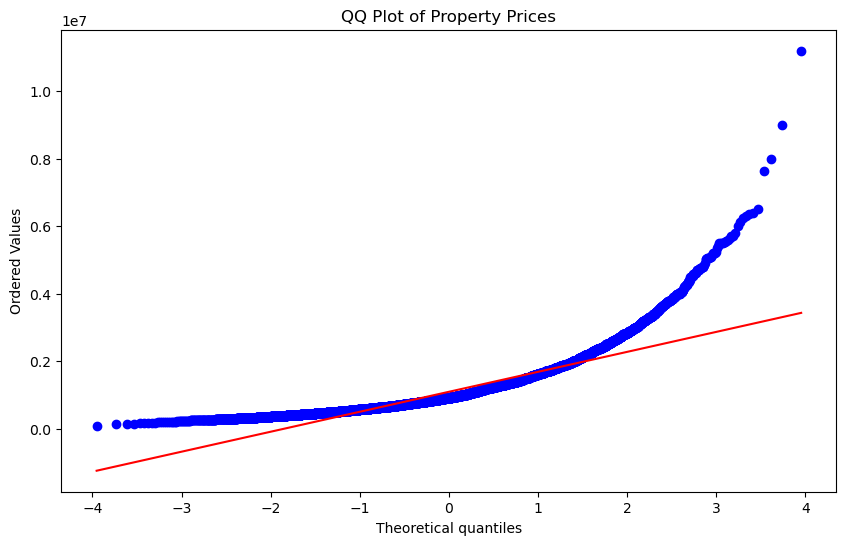

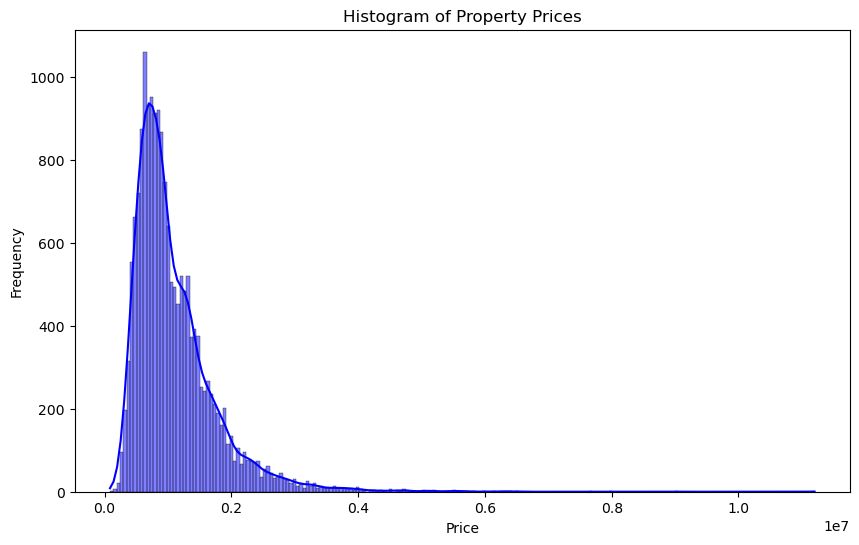

In [19]:
# Create a QQ and histogram plot to check the normality of the 'Price' column

import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df_clean_size['Price'], dist='norm', plot=plt)
plt.title('QQ Plot of Property Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_clean_size['Price'], kde=True, color='blue')
plt.title('Histogram of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [20]:
# Calculate the skewness and kurtosis of the 'Price' column

skewness = df_clean_size['Price'].skew()
kurtosis = df_clean_size['Price'].kurt()

skewness, kurtosis

(np.float64(2.4370412582639838), np.float64(12.507376673867142))

In [21]:
# Applying the Kolmogorov-Smirnov test to check the normality of the 'Price' column

df_clean_price = df_clean_size.dropna(subset=['Price'])

# Putting the 'Price' column into float again

df_clean_price['Price'] = df_clean_price['Price'].astype(float)

# Perform the Kolmogorov-Smirnov test for normality on the 'Price' column

ks_stat, p_value = stats.kstest(df_clean_size['Price'], 'norm', args=(df_clean_size['Price'].mean(), df_clean_size['Price'].std()))

ks_stat, p_value


(np.float64(0.12733997842741857), np.float64(1.1956945982601677e-254))

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/612293591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=df_clean_size, palette='viridis')


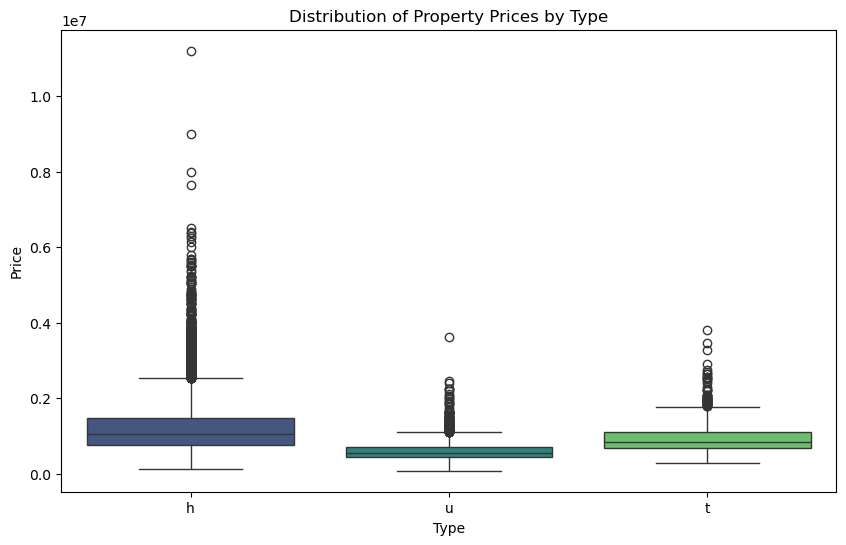

In [22]:
# Create a box plot to show the distribution of property prices by type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_clean_size, palette='viridis')

# Add labels to the plot

plt.title('Distribution of Property Prices by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()


/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/3015660107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Regionname', y='Price', data=median_price_per_region, palette='viridis')


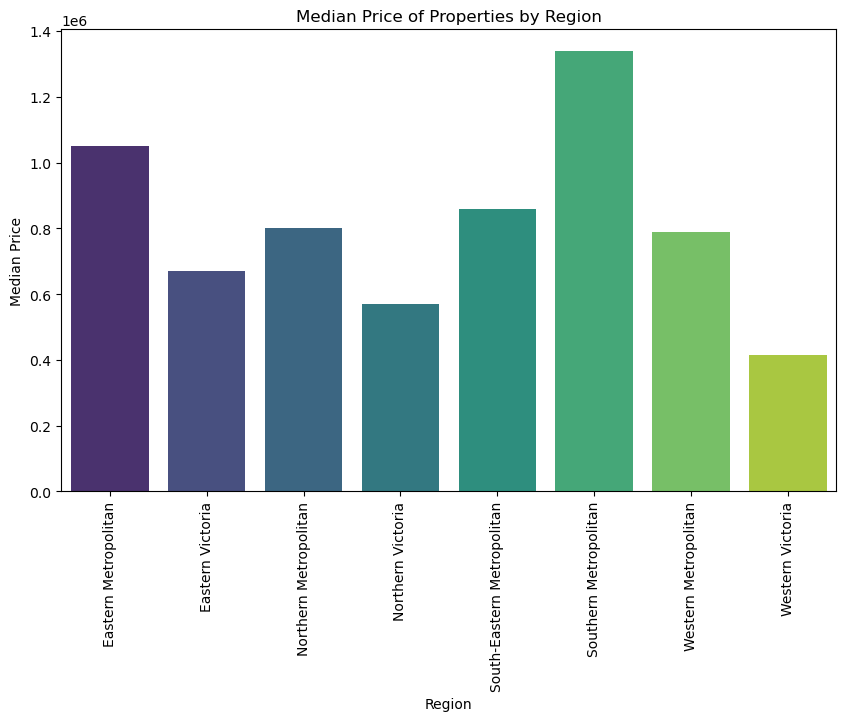

In [23]:
# Group the data per region and calculate the median price for each group

median_price_per_region = df_clean_size.groupby('Regionname')['Price'].median().reset_index()

# Display the results in a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Regionname', y='Price', data=median_price_per_region, palette='viridis')

# Add labels to the plot

plt.title('Median Price of Properties by Region')
plt.xlabel('Region')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()


In [24]:
# Using the chisquared to test the independence between the type of property and the region

from scipy.stats import chi2_contingency

# Turn the price variable into a categorical variable

df_clean_size['Price_category'] = pd.qcut(df_clean_size['Price'], q=5, labels=False)

# Create a contingency table

contingency_table = pd.crosstab(df_clean_size['Regionname'], df_clean_size['Price_category'])

# Perform the chi-squared test

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_val

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/4260163438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_size['Price_category'] = pd.qcut(df_clean_size['Price'], q=5, labels=False)


(np.float64(4048.9717081403946), np.float64(0.0))

In [25]:
# Calculate Cramer's V

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

chi2_stat, p_val, dof, cramers_v

(np.float64(4048.9717081403946),
 np.float64(0.0),
 28,
 np.float64(0.23725937321588664))

- p-value: The extremely low p-value (much less than 0.05) indicates that there is a statistically significant association between the region (Regionname) and the price of properties.

- Cramer’s V: The value of 0.237 indicates a moderate association between the region and the price of properties according to Cohen’s (1988) interpretation.

#### (Cohen (1988) provided guidelines for interpreting the strength of association based on the value of Cramer’s V:

- 0.10 or less: Weak association
- 0.11 to 0.30: Moderate association
- 0.31 or higher: Strong association)

In [31]:
# Converting the date from object to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# extracting the year from the date

df['Year'] = df['Date'].dt.year

# Calculate the median price for each year (first and last)

median_price_first_year = df[df['Year'] == df['Year'].min()]['Price'].median()
median_price_last_year = df[df['Year'] == df['Year'].max()]['Price'].median()

# Calculate the percentage change in median price

percentage_change = ((median_price_last_year - median_price_first_year) / median_price_first_year) * 100

median_price_first_year, median_price_last_year, percentage_change



(np.float64(885000.0), np.float64(836500.0), np.float64(-5.480225988700565))

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_11224/2278752929.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


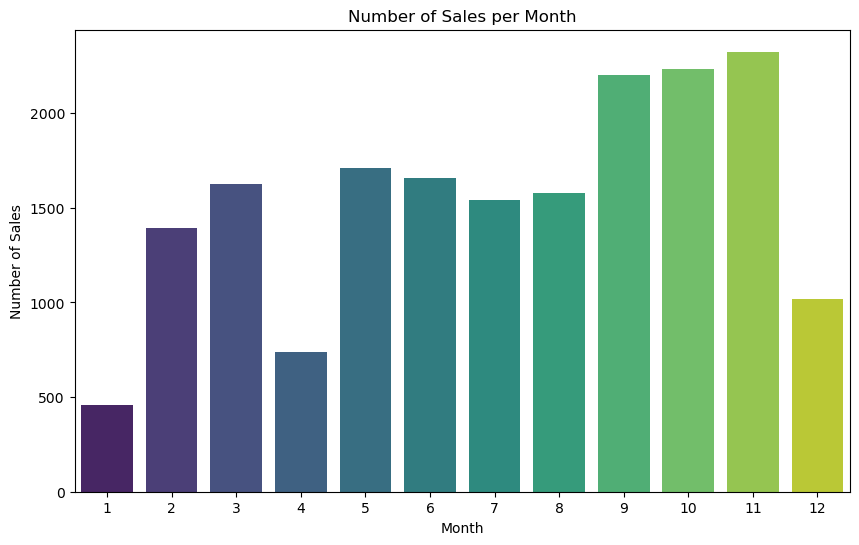

In [32]:
# Extracting the month from the date

df['Month'] = df['Date'].dt.month

# Count the number of sales per month (houses only)

monthly_sales = df[df['Type'] == 'h'].groupby('Month')['Price'].count()

# Display the results in a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')

# Add labels to the plot

plt.title('Number of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()
